In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from tqdm import tqdm

# LinearRegression model

In [2]:
# TODO
# Implement the linear regression using gradient descent by only numpy

class LinearRegression:
    
  def __init__(self):
      
    print("Don't cheat.")
    self.epoch = []
    self.train_loss = []
    self.weights = None

  def fit(self, X, y, lr=0.001, epochs=100, batch_size=1):
    # m 為資料筆數，n 為特徵數量
    m, n = X.shape

    # 在X右方加入一行1對應到參數theta_0
    X_new = np.hstack([X, np.ones((m,1))])
    y_new = y.reshape(y.shape[0], 1)
    self.weights = np.random.randn((n+1),1)

    for epoch in tqdm(range(epochs)):
      for batch in range(len(X)//batch_size):
        mini_batch_X = X_new[batch*batch_size:(batch+1)*batch_size]
        mini_batch_y = y_new[batch*batch_size:(batch+1)*batch_size]
        y_hat = self.predict(mini_batch_X)
        gradient = (1/batch_size) * np.dot(mini_batch_X.T, (y_hat - mini_batch_y))
        self.weights -= lr * gradient
      if(len(X)%batch_size!=0):
        mini_batch_X = X_new[batch*(len(X)//batch_size):]
        mini_batch_y = y_new[batch*(len(X)//batch_size):]
        y_hat = self.predict(mini_batch_X)
        gradient = (1/batch_size) * np.dot(mini_batch_X.T, (y_hat - mini_batch_y))
        self.weights -= lr * gradient

      self.epoch.append(epoch)
      self.train_loss.append(self.get_loss(X_new, y_new))

  def get_loss(self, X, y):
    y_hat = self.predict(X)
    loss = np.mean((y_hat - y)**2)
    return loss

  def predict(self, X):
    y_hat = X.dot(self.weights)
    return y_hat
              
  def evaluate(self, X, y):
    # m 為資料筆數，n 為特徵數量
    m, n = X.shape

    # 在X左方加入一行1對應到參數theta_0
    X = np.hstack([X, np.ones((m, 1))])
    y = y.reshape(y.shape[0], 1)

    return self.get_loss(X, y)
      
  def plot_curve(self):
    # self.epoch and self.train_loss may be helpful here.
    plt.plot(self.epoch, self.train_loss, color='red')
    plt.xlabel('epoch') # 設定 x 軸標題
    plt.ylabel('MSE loss') # 設定 y 軸標題
    plt.show()


# Load data & data pre-processing

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [4]:
df_train = pd.DataFrame(pd.read_csv("/content/drive/MyDrive/Pattern_Recognition/hw1/regression_train.csv"))
df_val   = pd.DataFrame(pd.read_csv("/content/drive/MyDrive/Pattern_Recognition/hw1/regression_val.csv"))
df_test  = pd.DataFrame(pd.read_csv("/content/drive/MyDrive/Pattern_Recognition/hw1/regression_test.csv"))

In [5]:
df_train.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [6]:
df_test.head()

,age,sex,bmi,children,smoker,region,charges
0,33,male,30.25,0,no,southeast,NaN
1,19,female,32.49,0,yes,northwest,NaN
2,50,male,37.07,1,no,southeast,NaN
3,41,female,32.60,3,no,southwest,NaN
4,52,female,24.86,0,no,southeast,NaN


In [7]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 938 entries, 0 to 937
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       938 non-null    int64  
 1   sex       938 non-null    object 
 2   bmi       938 non-null    float64
 3   children  938 non-null    int64  
 4   smoker    938 non-null    object 
 5   region    938 non-null    object 
 6   charges   938 non-null    float64
dtypes: float64(2), int64(2), object(3)
memory usage: 51.4+ KB


In [8]:
# TODO
# You may do the labelEncoder here

#### For multiple features, please use the following settings.####
# sex.female -> 0
# sex.male -> 1

# smoker.no -> 0
# smoker.yes -> 1

# region.northeast -> 0
# region.northwest -> 1
# region.southeast -> 2
# region.southwest -> 3
##################################################################
sex_mapping = {'female': 0, 'male': 1}
df_train['sex'] = df_train['sex'].map(sex_mapping)
df_val['sex'] = df_val['sex'].map(sex_mapping)
df_test['sex'] = df_test['sex'].map(sex_mapping)

smoker_mapping = {'no': 0, 'yes': 1}
df_train['smoker'] = df_train['smoker'].map(smoker_mapping)
df_val['smoker'] = df_val['smoker'].map(smoker_mapping)
df_test['smoker'] = df_test['smoker'].map(smoker_mapping)

region_mapping = {'northeast': 0, 'northwest': 1, 'southeast': 2, 'southwest': 3}
df_train['region'] = df_train['region'].map(region_mapping)
df_val['region'] = df_val['region'].map(region_mapping)
df_test['region'] = df_test['region'].map(region_mapping)

# You may try different label encoding for training your own model


# Single feature (using bmi)

In [9]:
# Do not modify here

x_train = df_train.drop(['charges'], axis=1)
y_train = df_train['charges']
x_train = x_train[['bmi']]

x_val = df_val.drop(['charges'], axis=1)
y_val = df_val['charges']
x_val = x_val[['bmi']]

x_test = df_test.drop(['charges'], axis=1)
x_test = x_test[['bmi']]

In [10]:
# TODO
# You may convert data to NumPy here 
x_train_np = x_train.to_numpy()
y_train_np = y_train.to_numpy()
x_val_np = x_val.to_numpy()
y_val_np = y_val.to_numpy()
x_test_np = x_test.to_numpy()

In [11]:
batch_size = x_train_np.shape[0]

# TODO
# Tune the parameters
# Refer to slide page 9
lr = 0.001
epochs = 250000

linear_reg = LinearRegression()
linear_reg.fit(x_train_np, y_train_np, lr=lr, epochs=epochs, batch_size=batch_size)

Don't cheat.


100%|██████████| 250000/250000 [00:16<00:00, 15506.35it/s]


In [12]:
print("Intercepts: ", linear_reg.weights[-1])
print("Weights: ", linear_reg.weights[:-1])

Intercepts:  [1382.38620691]
Weights:  [[380.1393524]]


In [13]:
print('training loss: ', linear_reg.evaluate(x_train_np, y_train_np))

training loss:  139562065.48425922


In [14]:
print('validation loss: ', linear_reg.evaluate(x_val_np, y_val_np))

validation loss:  136920263.51810002


In [15]:
m, n = x_test_np.shape
x_test_new = np.hstack([x_test_np, np.ones((m, 1))])
test_pred = linear_reg.predict(x_test_new)

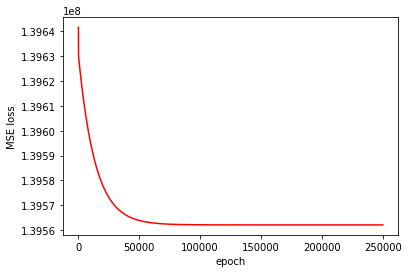

In [16]:
linear_reg.plot_curve()

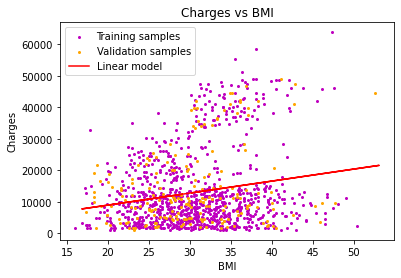

In [17]:
# Use matplotlib to plot the predicted line with the training and validation samples

# TODO
Training_samples = plt.scatter(x_train_np, y_train_np, s=4, c='m')
Validation_samples = plt.scatter(x_val_np, y_val_np, s=4, c='orange')
Linear_model, = plt.plot(x_test_np, test_pred, color='red')
plt.legend(handles=[Training_samples,Validation_samples,Linear_model],
    labels=['Training samples','Validation samples','Linear model'], loc='best')
plt.title("Charges vs BMI")
plt.xlabel('BMI')
plt.ylabel('Charges')
plt.show()

# Multiple features

In [18]:
# Do not modify here

x_train = df_train.drop(['charges'], axis=1)
y_train = df_train['charges']

x_val = df_val.drop(['charges'], axis=1)
y_val = df_val['charges']

x_test = df_test.drop(['charges'], axis=1)

In [19]:
# TODO
# You may convert data to NumPy here 
x_train_np = x_train.to_numpy()
y_train_np = y_train.to_numpy()
x_val_np = x_val.to_numpy()
y_val_np = y_val.to_numpy()
x_test_np = x_test.to_numpy()

In [20]:
batch_size = x_train_np.shape[0]

# TODO
# Tune the parameters
# Refer to slide page 10
lr = 0.0001
epochs = 2750000

linear_reg = LinearRegression()
linear_reg.fit(x_train_np, y_train_np, lr=lr, epochs=epochs, batch_size=batch_size)

Don't cheat.


100%|██████████| 2750000/2750000 [01:34<00:00, 29079.38it/s]


In [21]:
print("Intercepts: ", linear_reg.weights[-1])
print("Weights: ", linear_reg.weights[:-1])

Intercepts:  [-11852.09686324]
Weights:  [[  259.82767252]
 [ -383.8650082 ]
 [  333.220426  ]
 [  442.47569975]
 [24032.01547707]
 [ -416.10961229]]


In [22]:
print('training loss: ', linear_reg.evaluate(x_train_np, y_train_np))

training loss:  34697170.961008765


In [23]:
print('validation loss: ', linear_reg.evaluate(x_val_np, y_val_np))

validation loss:  41958207.374868214


In [24]:
m, n = x_test_np.shape
x_test_new = np.hstack([x_test_np, np.ones((m, 1))])
test_pred = linear_reg.predict(x_test_new)

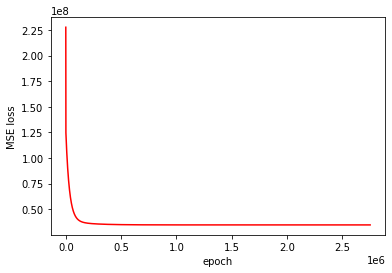

In [25]:
linear_reg.plot_curve()

# Feature extract

In [26]:
from google.colab import drive
drive.mount('/content/drive')
df_train = pd.DataFrame(pd.read_csv("/content/drive/MyDrive/Pattern_Recognition/hw1/regression_train.csv"))
df_val   = pd.DataFrame(pd.read_csv("/content/drive/MyDrive/Pattern_Recognition/hw1/regression_val.csv"))
df_test  = pd.DataFrame(pd.read_csv("/content/drive/MyDrive/Pattern_Recognition/hw1/regression_test.csv"))

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [27]:
sex_mapping = {'female': 0, 'male': 1}
df_train['sex'] = df_train['sex'].map(sex_mapping)
df_val['sex'] = df_val['sex'].map(sex_mapping)
df_test['sex'] = df_test['sex'].map(sex_mapping)

smoker_mapping = {'no': 0, 'yes': 1}
df_train['smoker'] = df_train['smoker'].map(smoker_mapping)
df_val['smoker'] = df_val['smoker'].map(smoker_mapping)
df_test['smoker'] = df_test['smoker'].map(smoker_mapping)

df_train = pd.get_dummies(df_train, columns=['region'])
df_val = pd.get_dummies(df_val, columns=['region'])
df_test = pd.get_dummies(df_test, columns=['region'])

In [28]:
# normalized
df_train['age'] = (df_train['age'] - df_train['age'].mean()) / df_train['age'].std()
df_train['bmi'] = (df_train['bmi'] - df_train['bmi'].mean()) / df_train['bmi'].std()

df_val['age'] = (df_val['age'] - df_val['age'].mean()) / df_val['age'].std()
df_val['bmi'] = (df_val['bmi'] - df_val['bmi'].mean()) / df_val['bmi'].std()

df_test['age'] = (df_test['age'] - df_test['age'].mean()) / df_test['age'].std()
df_test['bmi'] = (df_test['bmi'] - df_test['bmi'].mean()) / df_test['bmi'].std()

In [29]:
poly_list = ['age','sex','bmi','children','smoker']
for i in range(len(poly_list)):
  for j in range(i, len(poly_list)):
    poly_name = poly_list[i]+'*'+poly_list[j]
    df_train[poly_name] = df_train[poly_list[i]] * df_train[poly_list[j]]
    df_val[poly_name] = df_val[poly_list[i]] * df_val[poly_list[j]]
    df_test[poly_name] = df_test[poly_list[i]] * df_test[poly_list[j]]

In [30]:
df_train.head()

,age,sex,bmi,children,smoker,charges,region_northeast,region_northwest,region_southeast,region_southwest,...,sex*sex,sex*bmi,sex*children,sex*smoker,bmi*bmi,bmi*children,bmi*smoker,children*children,children*smoker,smoker*smoker
0,-1.455610,0,-0.498909,0,1,16884.92400,0,0,0,1,...,0,-0.000000,0,0,0.248910,-0.000000,-0.498909,0,0,1
1,-1.525780,1,0.476726,1,0,1725.55230,0,0,1,0,...,1,0.476726,1,0,0.227268,0.476726,0.000000,1,0,0
2,-0.824083,1,0.348747,3,0,4449.46200,0,0,1,0,...,1,0.348747,3,0,0.121624,1.046240,0.000000,9,0,0
3,-0.473234,1,-1.362354,0,0,21984.47061,0,1,0,0,...,1,-1.362354,0,0,1.856008,-0.000000,-0.000000,0,0,0
4,-0.543404,1,-0.336026,0,0,3866.85520,0,1,0,0,...,1,-0.336026,0,0,0.112913,-0.000000,-0.000000,0,0,0


In [31]:
# Do not modify here
x_train = df_train.drop(['charges'], axis=1)
y_train = df_train['charges']

x_val = df_val.drop(['charges'], axis=1)
y_val = df_val['charges']

x_test = df_test.drop(['charges'], axis=1)

In [32]:
# TODO
# You may convert data to NumPy here 
x_train_np = x_train.to_numpy()
y_train_np = y_train.to_numpy()
x_val_np = x_val.to_numpy()
y_val_np = y_val.to_numpy()
x_test_np = x_test.to_numpy()

# Train your own model and predict for testing data.

In [33]:
batch_size = x_train_np.shape[0]

# TODO
# Tune the parameters
# Refer to slide page 10
lr = 0.001
epochs = 500000

linear_reg = LinearRegression()
linear_reg.fit(x_train_np, y_train_np, lr=lr, epochs=epochs, batch_size=batch_size)
print('\ntraining loss: ', linear_reg.evaluate(x_train_np, y_train_np))
print('val loss: ', linear_reg.evaluate(x_val_np, y_val_np))

Don't cheat.


100%|██████████| 500000/500000 [00:32<00:00, 15178.54it/s]


training loss:  20840916.260915566
val loss:  27559598.610503044


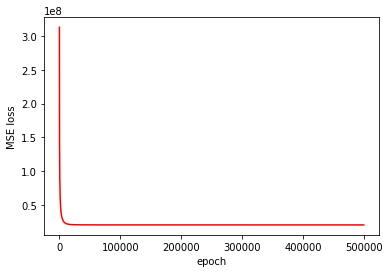

In [34]:
linear_reg.plot_curve()

In [35]:
m, n = x_test_np.shape
x_test_new = np.hstack([x_test_np, np.ones((m, 1))])
test_pred = linear_reg.predict(x_test_new)
print("test_pred shape: ", test_pred.shape)
assert test_pred.shape == (200, 1)

test_pred shape:  (200, 1)


# Output the csv file

In [36]:
df_test = pd.DataFrame(pd.read_csv("/content/drive/MyDrive/Pattern_Recognition/hw1/regression_test.csv"))
df_test["charges"] = test_pred
df_test.to_csv("/content/drive/MyDrive/Pattern_Recognition/hw1/311553030_prediction.csv")